In [2]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import scipy.optimize as optimize

In [4]:
def linear_f(x, m, b):
    return m * x + b

# param, cov = optimize.curve_fit(linear_f, frequency, vstop)
# m_err = np.sqrt(cov[0][0])
# b_err = np.sqrt(cov[1][1])
# chi_2 = np.sum(((vstop - linear_f(frequency, *param)) / sigma_y) ** 2)
# chi_2_2 = np.sum(((vstop - linear_f(frequency, *param))) ** 2 / sum((vstop - linear_f(frequency, *param))**2 / len(vstop)))
# param, m_err, b_err, chi_2, chi_2_2

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d2/jqp6s4g127sc72bbvlgt80kw0000gn/T/ipykernel_14540/3882799399.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.1, 0.85, f'$\chi_v^2 = {reduce_chi_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, color='purple')


slope uncertainty:  0.012509763505738816 intercept uncertainty:  0.30668066484536527
0.999904934195213
0.6886143017203776 0.07651270019115307


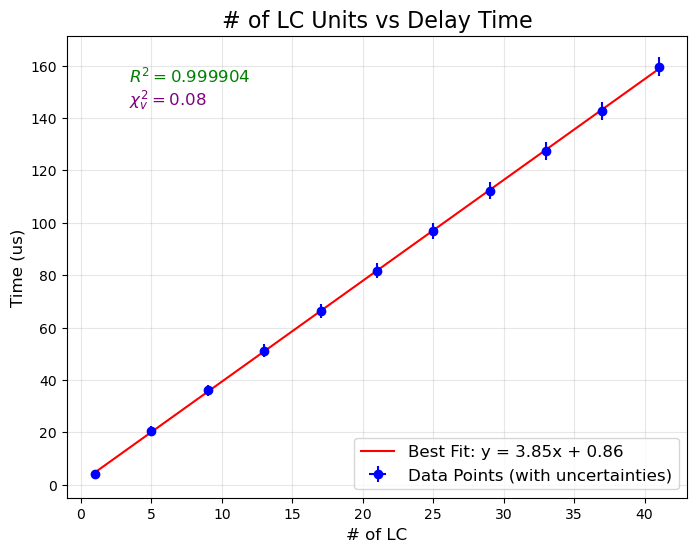

In [49]:
# Step 1: Define the data points and uncertainties
x = np.array([1, 5, 9, 13, 17, 21,25,29,33,37,41])  # Y values
y = np.array([4.04,20.45,36.08,51.12,66.35,81.72,96.98,112.13,127.45,142.69,159.6])  # X values
y_err = np.array([1, 1.8, 2.14, 2.46, 2.64, 2.88, 3.06, 3.27, 3.42, 3.46, 3.76])  # Uncertainties in X values

# Step 2: Perform a linear fit with uncertainties
coefficients, cov_matrix = optimize.curve_fit(linear_f, x, y)  # Linear fit with covariance
m, b = coefficients  # Slope and intercept
best_fit_line = m * x + b  # Best-fit line: y = mx + b
unc = np.sqrt(np.diag(cov_matrix))
print("slope uncertainty: ", unc[0], "intercept uncertainty: ", unc[1])    

# Step 3: Calculate R²
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)  # Total sum of squares
ss_res = np.sum((y - best_fit_line) ** 2)  # Residual sum of squares
r_squared = 1 - (ss_res / ss_tot)  # Coefficient of determination
print(r_squared)

# Step 4: Calculate χ²
sigma_y = np.sqrt(sum((y - best_fit_line) ** 2) / (len(y) - 2))
chi_squared = np.sum(((y - best_fit_line) / y_err) ** 2)  # Chi-squared statistic
reduce_chi_squared = chi_squared / (len(x) - 2)  # Reduced chi-squared statistic
print(chi_squared, reduce_chi_squared)

# Step 5: Plot the data and best-fit line
plt.figure(figsize=(8, 6))  # Set figure size

# Scatter plot with error bars
# plt.scatter(x, y, label='Data Points (with uncertainties)')
plt.errorbar(x, y, xerr=0, yerr=y_err, color='blue', fmt='o', label='Data Points (with uncertainties)')

# Plot the best-fit line
plt.plot(x, best_fit_line, color='red', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')

# Step 6: Display R² and χ² on the plot
plt.text(0.1, 0.9, f'$R^2 = {int(r_squared*1000000) / 1000000}$', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.1, 0.85, f'$\chi_v^2 = {reduce_chi_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, color='purple')

# Step 7: Customize the plot
plt.title('# of LC Units vs Delay Time', fontsize=16)
plt.ylabel('Time (us)', fontsize=12)
plt.xlabel('# of LC', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Step 8: Display the plot
plt.show()

Text(0.5, 1.0, 'Residual Plot')

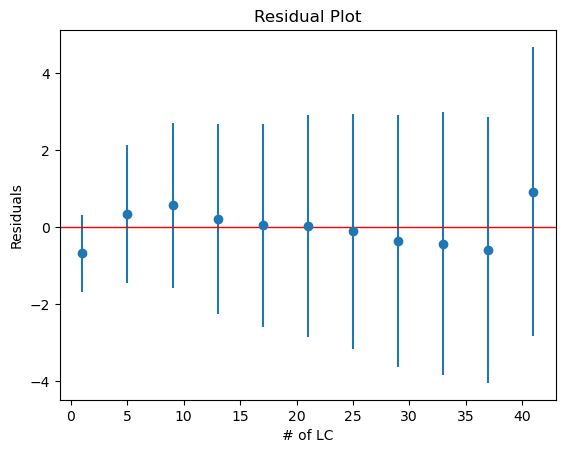

In [43]:
#residual plot with error bars
residuals = y - best_fit_line
plt.errorbar(x, residuals, yerr=y_err, fmt='o')
plt.axhline(0, color='red', lw=1)
plt.xlabel('# of LC')
plt.ylabel('Residuals')
plt.title('Residual Plot')


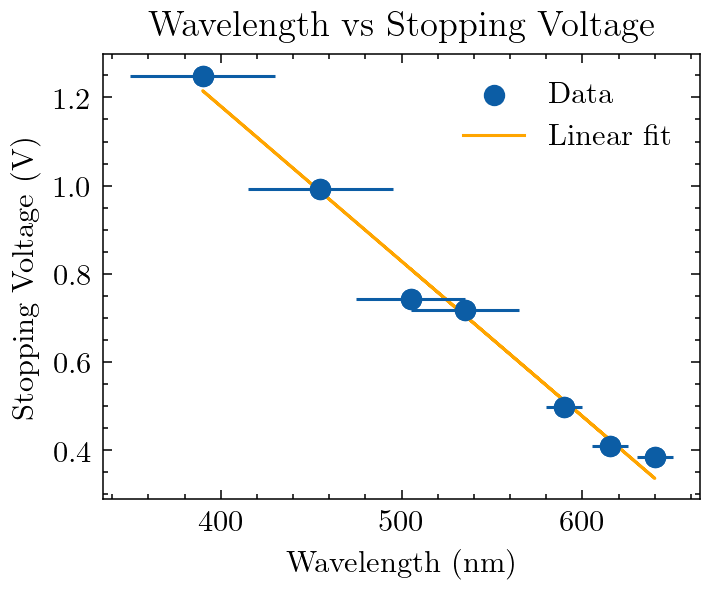

In [38]:
plt.figure()
plt.scatter(wavelength, vstop, label='Data')
plt.plot(wavelength, x[0] * wavelength + x[1], color="orange", label='Linear fit')
plt.errorbar(wavelength, vstop, xerr=w_error, yerr=v_error, fmt='o')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Stopping Voltage (V)')
plt.title('Wavelength vs Stopping Voltage')
plt.legend()
plt.savefig('./img/part1.png')
plt.show()